<p style="text-align: left;"> Lucas Meserve 12196628 <span style="float:right;"> 37262_workshop7</span></p>

In [1]:
from math import *
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

## Question 1

### Method:

I started with a function that runs a single round of the game.
That is passed to a function that simulates 20 rounds and records the winner of each round.
This is then passed to a function that will run the game 500 time and record the 

### Results:


In [2]:
def single_round():
    h = .1
    l = 0.5
    T = np.random.exponential(30)
    position = np.array([1])
    
    for time in np.arange(0, T, h):
        p = np.random.random()
        
        if p <= (h * l):
            
            if position[-1] < 10:
                position = np.append(position, position[-1] + 1)
            
            if position[-1] == 10:
                    position = np.append(position, 1)
                    
    return position

In [3]:
def twenty_rounds():
    results = np.array([])
    for item in range(20):
        results = np.append(results, single_round()[-1])
    return pd.Series(results)

In [10]:
def fiveHundred_games():
    np.random.seed(1234)
#     df = pd.DataFrame()
#     for item in range(500):
#             game = pd.DataFrame(twenty_rounds())
#             df = pd.concat([df, game], axis=1)
            
    df = pd.concat([pd.DataFrame(twenty_rounds()) for _ in range(500)], axis=1)        
    df.columns = ['round'+str(i) for i in range(500) ]            
    return df

In [11]:
df = fiveHundred_games()
df

round0  round1  round2  round3  round4  round5  round6  round7  round8  \
0        5       7       2       7       3       3       9       3       1   
1        2       4       3       2       8       8       7       1       8   
2        7       3       5       4       2       7       5       9       9   
3        5       7       2       1       8       7       3       5       2   
4        7       8       8       9       5       5       2       5       4   
5        8       1       9       2       2       4       9       4       7   
6        6       9       7       7       2       9       1       1       1   
7        2       6       2       6       3       1       1       6       4   
8        2       9       3       9       4       4       7       5       2   
9        1       6       4       3       6       3       8       2       6   
10       9       9       4       9       7       3       3       2       9   
11       1       8       2       5       4       6       8       2       2   
12       1       6       4       3       7       6       8       3       3   
13       4       4       6       6       4       4       8       1       7   
14       2       2       9       9       8       2       8       3       1   
15       3       7       4       8       3       1       7       3       3   
16       9       7       3       8       3       4       4       2       7   
17       3       1       4       3       4       5       3       7       9   
18       5       1       1       3       3       9       3       3       2   
19       4       5       5       5       1       2       6       6       7   

    round9    ...     round490  round491  round492  round493  round494  \
0        8    ...            5         4         3         1         4   
1        7    ...            6         8         9         8         5   
2        2    ...            2         1         2         5         1   
3        7    ...            1         3         2         6         1   
4        6    ...            1         1         9         8         5   
5        1    ...            5         3         1         8         1   
6        8    ...            6         7         4         6         8   
7        4    ...            2         8         7         9         2   
8        8    ...            7         5         2         4         3   
9        1    ...            5         1         9         5         6   
10       9    ...            4         9         6         2         1   
11       5    ...            5         3         3         5         2   
12       7    ...            1         4         8         6         5   
13       9    ...            9         9         5         8         3   
14       7    ...            1         1         8         3         4   
15       3    ...            5         2         9         9         4   
16       8    ...            5         9         9         1         6   
17       5    ...            7         3         8         2         8   
18       3    ...            6         7         2         1         1   
19       8    ...            3         5         4         5         1   

    round495  round496  round497  round498  round499  
0          2         2         2         2         6  
1          9         8         6         8         4  
2          2         9         7         3         3  
3          8         8         3         4         3  
4          2         8         6         4         7  
5          5         1         2         9         7  
6          9         4         8         7         1  
7          4         9         7         1         1  
8          4         1         5         9         7  
9          6         5         1         5         8  
10         8         1         7         9         7  
11         8         6         5         9         6  
12         1         1         4         3         1  
13         6         6         8        

#### Part i : Proportion each child wins over all

In [280]:
pd.value_counts(df.values.flatten(), normalize=True)

1    0.1388
2    0.1330
3    0.1206
4    0.1133
5    0.1115
6    0.1043
7    0.0982
8    0.0905
9    0.0898
dtype: float64

#### Part ii: Proportion each child wins in the first round

In [292]:
pd.value_counts(df.ix[:0].values.flatten(), normalize=1)

2    0.144
1    0.144
3    0.122
5    0.110
8    0.108
4    0.108
9    0.096
7    0.088
6    0.080
dtype: float64

#### Part iii: Proportion each child wins in the last round

In [301]:
pd.value_counts(df.ix[19:19].values.flatten(), normalize=True)

1    0.138
3    0.132
2    0.130
4    0.118
5    0.108
8    0.100
6    0.096
7    0.090
9    0.088
dtype: float64

#### Part iv

I expect that the proportion of wins from the first round will be biased toward the the childern earlier in the count because the parcel starts at child 1. The proportions of wins from the last round are closer to the over all proportions because the starting point isn't fixed in children with the lower numbers.

#### Part v

In [303]:
def stratigic_round():
    h = .1
    l = 0.5
    T = np.random.exponential(30)
    position = np.array([1])
    
    for time in np.arange(0, T, h):
        p = np.random.random()
        
        if time < 20:
            if p <= (h * l): # Is the ball passed

                if position[-1] < 10:
                    position = np.append(position, position[-1] + 1)

                if position[-1] == 10:
                        position = np.append(position, 1)
                        
        if time >= 20:
            if p <= (0.5 * exp((20 - time) / 10)):
                    
                if position[-1] < 10:
                    position = np.append(position, position[-1] + 1)

                if position[-1] == 10:
                        position = np.append(position, 1)
                        
    return position

In [306]:
def stratigic_twenty():
    results = np.array([])
    for item in range(20):
        results = np.append(results, stratigic_round()[-1])
    return pd.Series(results)

def stratigic_fiveHundred():
    np.random.seed(1234)
    df = pd.DataFrame()
    for item in range(500):
            game = pd.DataFrame(stratigic_twenty())
            df = pd.concat([df, game], axis=1)
    return df

In [307]:
strat = stratigic_fiveHundred()

In [309]:
pd.value_counts(strat.values.flatten(), sort=False, normalize=True)

1    0.1345
2    0.1394
3    0.1223
4    0.1126
5    0.1073
6    0.1043
7    0.1006
8    0.0907
9    0.0883
dtype: float64

Once the children start to play straigicly, the proportion of wins becomes less conentrated in the lower numbers.

## Question 2

### Method:
    
### Results:


In [4]:
h = 0.01
l = 10
u = np.array([1, 3, 2, 1])

pUp = h * l
pDown = h * u

pUp, pDown

(0.1, array([ 0.01,  0.03,  0.02,  0.01]))

In [5]:
 def positionChange(position):
    '''
    This function takes a position argument and randomly determines
    a new position
    '''
    r = np.random.random()
    if position == 0:
        if r < 0.1: #chance up
            position += 1
        else: #chance no move
            position = 0

    elif position == 1:
        if r < 0.1: #chance up
            position += 1
        elif r < .01 + .1: #chance down
            position -= 1
        else: #chance no move
            position = 1

    elif position == 2:
        if r < 0.1: #chance up
            position += 1
        elif r < .03 + .1: #chance down
            position -= 1
        else: #chance no move
            position = 2

    elif position == 3:
        if r < 0.1: #chance up
            position += 1
        elif r < .02 + .1: #chance down
            position -= 1
        else: #chance no move
            position = 3

    elif position == 4:
        if r < .01: #chance down
            position -= 1
        else: #chance no move
            position = 4
            
    return position

In [6]:
def runningPosition():
    '''
    This function feeds an inital position to the positionChange function.
    Then it records the position for each step as it iterates through a set period.
    '''
    position = np.array([0])
    for move in np.arange(0, 5999, 1):
        position = np.append(position, positionChange(position[-1]))
    return pd.Series(position)

In [7]:
print(runningPosition().value_counts())
len(runningPosition())

4    5501
3     394
1      54
2      39
0      12
dtype: int64


6000

In [8]:
def runningPositionCount():
    '''
    This function feeds an inital position to the positionChange function.
    Then it records the position for each step as it iterates through a set period.
    It recoreds the number of 0s, 1s, 2s, & 3s
    as it iterates throught the position changes.
    It returns the cumulative sum of the counts for each state
    divided by the number of itterations.
    '''
    position = np.array([0])
    
    zeros = np.array([])
    ones = np.array([])
    twos = np.array([])
    threes = np.array([])
    fours = np.array([])    
    realization = 1
    weight = np.arange(1, 6000, 1)
    
    for move in np.arange(0, 5999, 1):
        new_pos = positionChange(position[-1])
        position = np.append(position, new_pos)
        
        if new_pos == 0:
            zeros = np.append(zeros, 1)
        else:
            zeros = np.append(zeros, 0)
        
        if new_pos == 1:
            ones = np.append(ones, 1)
        else:
            ones = np.append(ones, 0)
        
        if new_pos == 2:
            twos = np.append(twos, 1)
        else:
            twos = np.append(twos, 0)
        
        if new_pos == 3:
            threes = np.append(threes, 1)
        else:
            threes = np.append(threes, 0)

        if new_pos == 4:
            fours = np.append(fours, 1)
        else:
            fours = np.append(fours, 0)
            
        realization += 1
                                      
    return (
            pd.Series(position),
            zeros.cumsum() / weight,
            ones.cumsum() / weight,
            twos.cumsum() / weight,
            threes.cumsum() / weight,
            fours.cumsum() / weight
            )

In [9]:
runningPositionCount()[2]

array([ 0.        ,  0.        ,  0.        , ...,  0.00083375,
        0.00083361,  0.00083347])

In [10]:
def graph(state):
    '''
    Graph probability that a state is occupied.
    '''
    time = np.arange(0, 5999, 1)
    fig, ax = plt.subplots(figsize=(10,6))
    for item in range(200):
        ax.plot(time, runningPositionCount()[state + 1])
    plt.show()

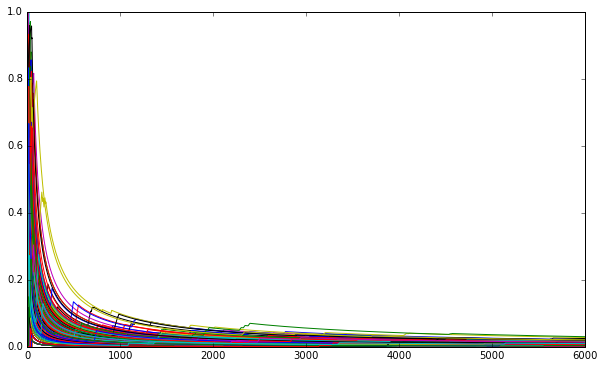

In [11]:
graph(1)

The probability that the system in in state one appears to be highest in the first 100 time periods.

Part ii

In [315]:
def matrix_creator():
    l = 10
    u = np.array([0, 1, 3, 2, 1])

    M = np.zeros((5, 5))
    for item in range(4):
        M[item, item] = - (10 + u[item])
        M[4, 4] = - u[4]
        M[item, item + 1] = u[item + 1]
        M[item, item - 1] = l
        M[4, 3] = l
        M[0, 4] = 0

    return M

M = matrix_creator()
M

array([[-10.,   1.,   0.,   0.,   0.],
       [ 10., -11.,   3.,   0.,   0.],
       [  0.,  10., -13.,   2.,   0.],
       [  0.,   0.,  10., -12.,   1.],
       [  0.,   0.,   0.,  10.,  -1.]])

In [328]:
w, v = np.linalg.eig(M)
print(w)
print('')
print(v)

[ -1.97015621e+01  -1.32984379e+01  -9.44948974e+00  -4.55051026e+00
   3.67185868e-17]

[[ -2.10770073e-02  -4.60792441e-02  -7.65517152e-02  -3.78921795e-02
    5.96893387e-04]
 [  2.04479896e-01   1.51989524e-01  -4.21425044e-02  -2.06493044e-01
    5.96893387e-03]
 [ -5.22841481e-01   3.71513203e-02   2.33391589e-01  -3.17617657e-01
    1.98964462e-02]
 [  7.29527852e-01  -7.65491302e-01   6.25042137e-01  -3.09388350e-01
    9.94822312e-02]
 [ -3.90089260e-01   6.22429702e-01  -7.39739506e-01   8.71391231e-01
    9.94822312e-01]]


To solve for the local maximum of p1, we must find an equation, differentiate it, and set p1' == 0. We will use the equations described on page 18 amd 19 of lecture 8.

Step 1: pull the second element from each of the eigenvectors.
Step 2: since the eigenvalues will come out of the exponent when we take the derivative, we can multiply the two togeter.


In [343]:
v1 = v[1,:]
v1

array([ 0.2044799 ,  0.15198952, -0.0421425 , -0.20649304,  0.00596893])

In [350]:
np.multiply(w, v1)

array([ -4.02857337e+00,  -2.02122325e+00,   3.98225163e-01,
         9.39648714e-01,   2.19170817e-19])

In [357]:
from scipy.optimize import fsolve

prob1 = lambda t: (-4.02857337e+00*exp(-1.97015621e+01*t) -2.02122325e+00*exp(-1.32984379e+01*t) + 3.98225163e-01*exp(-9.44948974e+00*t) + 9.39648714e-01*exp(-4.55051026e+00*t) + 2.19170817e-19*exp(3.67185868e-17*t))

t_guess = 10
fsolve(prob1, t_guess)

/Users/user/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([ 17.9678228])

This is my best attempt at solving this in python. scipy.optimization.fsolve() finds the roots of 'f(x) == 0'. This seems reasonable given the shape of the graph above.